In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
observations = pd.read_csv('https://raw.githubusercontent.com/noo-rashbass/synthetic-data-service/master/Aisha/observations.csv')

In [2]:
obs_id = observations['Observation_Id'].values
part_id = observations['Participant_Id'].values
tuple_index_list = [('','')]*observations.shape[0]
for i in range(observations.shape[0]):
    tuple_index_list[i]=(part_id[i],obs_id[i])
index_new = pd.MultiIndex.from_tuples(tuple_index_list)
observ_columns = (observations.keys()).tolist()
observation_id = pd.DataFrame(observations.values[:,2:],index=index_new,columns = observ_columns[2:])
observation_id

Household_Id Abdominal pain [HP_0002027]  \
1001 100118961  HH216001613                          No   
     100120115  HH216001613                          No   
     100120199  HH216001613                          No   
     100120031  HH216001613                          No   
     100119668  HH216001613                          No   
...                     ...                         ...   
3497 349720999  HH112000801                          No   
3498 349820999  HH118002402                          No   
3499 349920999  HH145001701                          No   
3500 350020999  HH116000604                          No   
3501 350120999  HH108001201                         Yes   

               Abdominal pain duration (days) [EUPATH_0000154]  \
1001 100118961                                               0   
     100120115                                               0   
     100120199                                               0   
     100120031                                               0   
     100119668                                               0   
...                                                        ...   
3497 349720999                                               0   
3498 349820999                                               0   
3499 349920999                                               0   
3500 350020999                                               0   
3501 350120999                                               3   

               Admitting hospital [EUPATH_0000318]  \
1001 100118961                                 NaN   
     100120115                                 NaN   
     100120199                                 NaN   
     100120031                                 NaN   
     100119668                                 NaN   
...                                            ...   
3497 349720999                                 NaN   
3498 349820999                                 NaN   
3499 349920999                                 NaN   
3500 350020999                                 NaN   
3501 350120999                                 NaN   

               Age at visit (years) [EUPATH_0000113] Anorexia [SYMP_0000523]  \
1001 100118961                                 34.08                      No   
     100120115                                 37.24                      No   
     100120199                                 37.47                      No   
     100120031                                 37.01                      No   
     100119668                                 36.02                      No   
...                                              ...                     ...   
3497 349720999                                  1.32                      No   
3498 349820999                                  1.61                      No   
3499 349920999                                  2.08                      No   
3500 350020999                                  1.32                      No   
3501 350120999                                  3.87                      No   

               Anorexia duration (days) [EUPATH_0000155]  \
1001 100118961                                         0   
     100120115                                         0   
     100120199                                         0   
     100120031                                         0   
     100119668                                         0   
...                                                  ...   
3497 349720999                                         0   
3498 349820999                                         0   
3499 349920999                                         0   
3500 350020999                                         0   
3501 350120999                                         0   

               Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]  \
1001 100118961                                                NaN                    
     10012

In [3]:
p=observations['Participant_Id'].groupby(observations['Participant_Id']).count()
part_id_list = p.index.tolist()
indi_index_max = ['Abdominal pain duration (days) [EUPATH_0000154]','Anorexia duration (days) [EUPATH_0000155]','Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]','Cough duration (days) [EUPATH_0000156]','Days since enrollment [EUPATH_0000191]','Diarrhea duration (days) [EUPATH_0000157]','Fatigue duration (days) [EUPATH_0000158]','Fever, subjective duration (days) [EUPATH_0000164]','Headache duration (days) [EUPATH_0000159]','Jaundice duration (days) [EUPATH_0000160]','Joint pains duration (days) [EUPATH_0000161]','Muscle aches duration (days) [EUPATH_0000162]','Seizures duration (days) [EUPATH_0000163]','Vomiting duration (days) [EUPATH_0000165]']
indi_index_mean = ['Age at visit (years) [EUPATH_0000113]','Height (cm) [EUPATH_0010075]','Hemoglobin (g/dL) [EUPATH_0000047]','Temperature (C) [EUPATH_0000110]','Weight (kg) [EUPATH_0000732]']
malaria = ['Malaria diagnosis [EUPATH_0000090]']
joint_index = indi_index_max+indi_index_mean+malaria
part_dataframe = pd.DataFrame(np.zeros((len(part_id_list),len(joint_index))), index = part_id_list, columns =joint_index)
part_dataframe.loc[1001]

Abdominal pain duration (days) [EUPATH_0000154]                        0.0
Anorexia duration (days) [EUPATH_0000155]                              0.0
Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]    0.0
Cough duration (days) [EUPATH_0000156]                                 0.0
Days since enrollment [EUPATH_0000191]                                 0.0
Diarrhea duration (days) [EUPATH_0000157]                              0.0
Fatigue duration (days) [EUPATH_0000158]                               0.0
Fever, subjective duration (days) [EUPATH_0000164]                     0.0
Headache duration (days) [EUPATH_0000159]                              0.0
Jaundice duration (days) [EUPATH_0000160]                              0.0
Joint pains duration (days) [EUPATH_0000161]                           0.0
Muscle aches duration (days) [EUPATH_0000162]                          0.0
Seizures duration (days) [EUPATH_0000163]                              0.0
Vomiting duration (days) 

In [4]:
for individual in part_id_list:
    observ_indi = observation_id.loc[individual]
    indi_times = observ_indi.values.shape[0]
#     indi_max_series = pd.Series([0]*len(indi_index_max),index = indi_index_max)
#     indi_mean_series = pd.Series([0]*len(indi_index_mean),index = indi_index_mean)
#     indi_malaria_series = pd.Series([0]*len(malaria),index = malaria)

    for n in range(len(indi_index_max)):
        column = indi_index_max[n]
        if all(observ_indi.loc[:,column].isnull()):
            maxvalue = None
        else:
            maxvalue = np.max(observ_indi.loc[:,column].dropna().values)
        part_dataframe.loc[individual, column] = maxvalue

    for n in range(len(indi_index_mean)):
        column = indi_index_mean[n]
        if all(observ_indi.loc[:,column].isnull()):
            maxvalue = None
        else:
            meanvalue = np.mean(observ_indi.loc[:,column].dropna().values)
        part_dataframe.loc[individual, column] = meanvalue

    for n in range(len(malaria)):
        column = malaria[n]
        malaria_diagnosis = observ_indi.loc[:,column]
        malaria_diagnosis = malaria_diagnosis.groupby(malaria_diagnosis).count()
        malaria_diagnosis_times = np.sum(malaria_diagnosis.values)
        malaria_diagnosis_proportion=0
        if 'Yes' in malaria_diagnosis.index.tolist():
            malaria_diagnosis_proportion = malaria_diagnosis['Yes'] * 100 / malaria_diagnosis_times
        part_dataframe.loc[individual, column] = malaria_diagnosis_proportion



In [11]:
pdf_values = part_dataframe.fillna(0).values

In [12]:
from sklearn.manifold import TSNE
pdf_embedded = TSNE(n_components=2).fit_transform(pdf_values)

In [55]:
malaria_column = part_dataframe.iloc[:,-1].values
malaria_yes = np.where(malaria_column != 0)
malaria_no = np.where(malaria_column == 0)

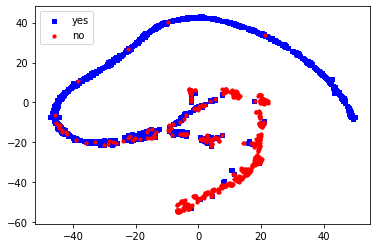

In [63]:
x = pdf_embedded[malaria_yes]
y = pdf_embedded[malaria_no]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:,0],x[:,1], s=10, c='b', marker="s", label='yes',alpha=1)
ax1.scatter(y[:,0],y[:,1], s=10, c='r', marker="o", label='no',alpha=1)
plt.legend(loc='upper left');
plt.show()

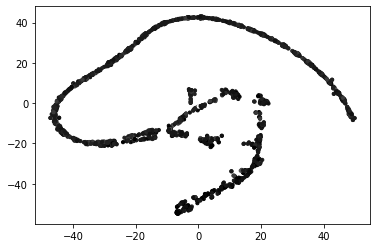

In [65]:
plt.scatter(pdf_embedded[:,0],pdf_embedded[:,1],c=part_dataframe.loc[:,'Fever, subjective duration (days) [EUPATH_0000164]'].values,s=10)
plt.show()

(array([792., 270., 184.,  88.,  49.,  21.,  14.,   2.,   0.,   1.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

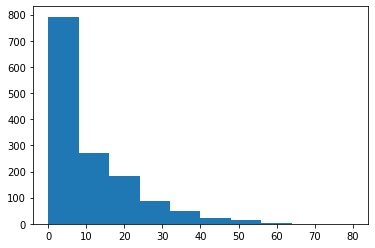

In [39]:
plt.hist(malaria_column)

array([0.21627137, 0.24054959, 0.38539764, 0.29827591, 0.11729519,
       0.81489208, 0.25307088, 0.32233863, 0.34919702, 0.82057721])

array([0.99316846, 0.26113692, 0.38712096, 0.23761433, 0.59282344,
       0.5162965 , 0.77735201, 0.93941763, 0.01781876, 0.47751045])

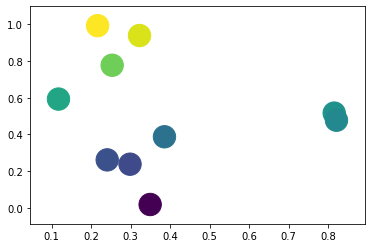

In [35]:
# Generate data...
x = np.random.random(10)
y = np.random.random(10)

# Plot...
plt.scatter(x, y, c=y*10, s=500)
display(x,y)
plt.show()